# import libraries

In [103]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt


# extract and safe combined data (raw)

In [104]:
raw_weather_solo = "/home/phillip/Dokumente/repositories/ds1_weather_data_ger/database/raw_data_weather"
output_path = "/home/phillip/Dokumente/repositories/ds1_weather_data_ger/data_preparation_and_transformation"

os.chdir(raw_weather_solo)

extension = 'txt'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

combined_csv_raw = pd.concat([pd.read_csv(f) for f in all_filenames])
combined_csv_raw.to_csv(os.path.join(output_path, "combined_data_raw.csv"), index=False, encoding='utf-8-sig')

# explore data

**read in data in pd df**

In [105]:
combined_data_raw_path = "/home/phillip/Dokumente/repositories/ds1_weather_data_ger/data_preparation_and_transformation/combined_data_raw.csv"

df_combdata_raw = pd.read_csv(combined_data_raw_path, 
    sep=';', 
    skipinitialspace=True)

**explore columns and structures**

In [106]:
#show number of columns and rows
df_combdata_raw.shape

# show column names and data types
df_combdata_raw.info() 

#show column names and first values of dataframe
df_combdata_raw.head() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   STATIONS_ID  3850 non-null   int64  
 1   MESS_DATUM   3850 non-null   int64  
 2   QN_3         3850 non-null   int64  
 3   FX           3850 non-null   float64
 4   FM           3850 non-null   float64
 5   QN_4         3850 non-null   int64  
 6   RSK          3850 non-null   float64
 7   RSKF         3850 non-null   int64  
 8   SDK          3850 non-null   float64
 9   SHK_TAG      3850 non-null   int64  
 10  NM           3850 non-null   float64
 11  VPM          3850 non-null   float64
 12  PM           3850 non-null   float64
 13  TMK          3850 non-null   float64
 14  UPM          3850 non-null   float64
 15  TXK          3850 non-null   float64
 16  TNK          3850 non-null   float64
 17  TGK          3850 non-null   float64
 18  eor          3850 non-null   object 
dtypes: flo

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,1975,20211211,10,7.7,-999.0,3,0.9,6,0.1,0,-999.0,6.1,-999.00,2.5,84.08,4.8,-0.3,-2.4,eor
1,1975,20211212,10,9.6,3.9,3,2.4,6,0.0,0,8.0,8.7,-999.00,5.2,97.13,8.3,1.7,1.7,eor
2,1975,20211213,10,7.2,3.2,3,0.5,6,0.0,0,7.8,11.2,1022.55,9.3,95.25,10.6,7.7,6.8,eor
3,1975,20211214,10,9.8,3.7,3,0.5,6,0.0,0,7.8,10.2,1022.80,8.1,94.29,8.7,7.5,5.9,eor
4,1975,20211215,10,10.3,4.3,3,0.0,6,0.0,0,7.5,10.6,1025.53,9.7,88.33,10.6,8.4,7.3,eor


**plot sample data**

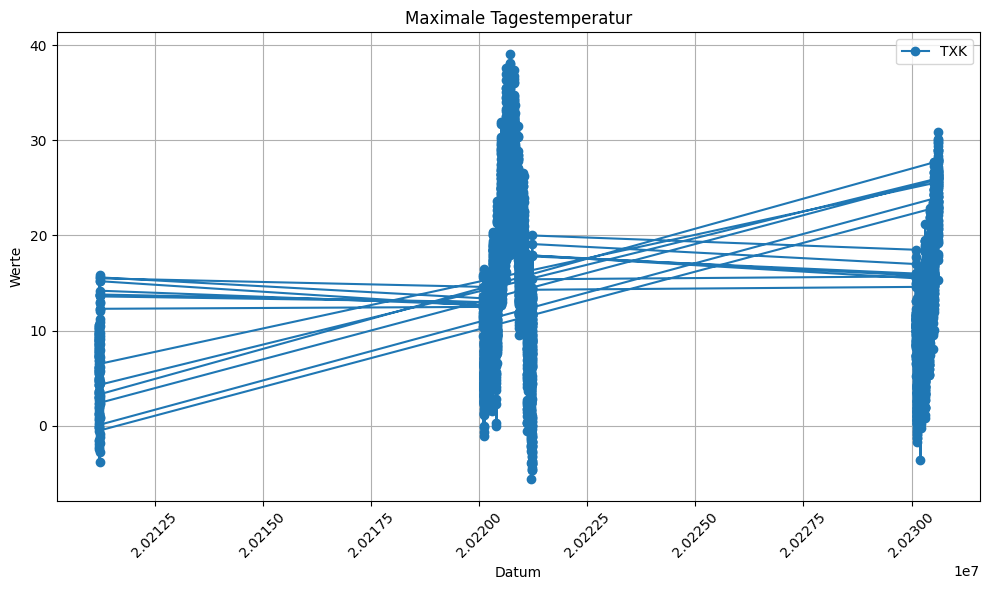

In [107]:
# create plot (optional)
plt.figure(figsize=(10, 6))  # Größe des Plots festlegen (optional)

# Spalte1 plotten
plt.plot(df_combdata_raw['MESS_DATUM'], df_combdata_raw['TXK'], label='TXK', marker='o')



# Achsenbeschriftungen und Titel hinzufügen (optional)
plt.xlabel('Datum')
plt.ylabel('Werte')
plt.title('Maximale Tagestemperatur')

# Legende hinzufügen
plt.legend()

# Plot anzeigen
plt.grid(True)  # Gitterlinien anzeigen (optional)
plt.xticks(rotation=45)  # x-Achsentick-Beschriftungen drehen (optional)
plt.tight_layout()  # Plot-Layout optimieren (optional)
plt.show()


**findings for the transformation**
- MESS_DATUM is in the wrong datatype, visualisation is not possible -> change data type
- there are some missing NaN values which are changed to -999.00 -> delete rows with these values            
- some columns will not be used in the first time -> delete unused columns
- column names are encrypted -> rename column names

# data transformation

**change data types**

In [108]:
df_combdata_raw['MESS_DATUM'] = pd.to_datetime(df_combdata_raw['MESS_DATUM'], format='%Y%m%d')
print(df_combdata_raw.dtypes)


STATIONS_ID             int64
MESS_DATUM     datetime64[ns]
QN_3                    int64
FX                    float64
FM                    float64
QN_4                    int64
RSK                   float64
RSKF                    int64
SDK                   float64
SHK_TAG                 int64
NM                    float64
VPM                   float64
PM                    float64
TMK                   float64
UPM                   float64
TXK                   float64
TNK                   float64
TGK                   float64
eor                    object
dtype: object


**delete rows with unplausible values**

In [109]:
# in case of missing values there are float64 with value -999.00
# to troubleshot these missing values in every column the rows with -999.00 are deleted

df_combdata_raw = df_combdata_raw[~(df_combdata_raw == -999.00).any(axis=1)]

print(df_combdata_raw)


      STATIONS_ID MESS_DATUM  QN_3    FX   FM  QN_4  RSK  RSKF     SDK  \
2            1975 2021-12-13    10   7.2  3.2     3  0.5     6   0.000   
3            1975 2021-12-14    10   9.8  3.7     3  0.5     6   0.000   
4            1975 2021-12-15    10  10.3  4.3     3  0.0     6   0.000   
5            1975 2021-12-16    10   8.7  3.8     3  0.1     6   0.200   
6            1975 2021-12-17    10   8.7  3.6     3  0.3     6   0.000   
...           ...        ...   ...   ...  ...   ...  ...   ...     ...   
3527          427 2022-07-26    10  17.8  4.8     3  0.0     6   5.700   
3528          427 2022-07-27    10  10.8  4.0     3  0.0     0   4.333   
3529          427 2022-07-28    10   5.8  1.9     3  0.0     0  13.117   
3530          427 2022-07-29    10  10.6  4.8     3  0.0     0   8.950   
3531          427 2022-07-30    10   9.6  3.2     3  0.0     0   5.900   

      SHK_TAG   NM   VPM       PM   TMK    UPM   TXK   TNK   TGK  eor  
2           0  7.8  11.2  1022.55   9.3

**rename columns**

In [110]:

#column meanings:
    #STATIONS_ID Station ID VARCHAR2
    #MESS_DATUM Referenzdatum NUMBER YYYYMMDD
    #QN_3 Qualitaetsniveau der nachfolgenden Spalten NUMBER numerical code
    #FX Tagesmaximum Windspitze m/s NUMBER 9990.0
#FM Tagesmittel Windgeschwindigkeit m/s NUMBER 9990.0
#QN_4 Qualitaetsniveau der nachfolgenden Spalten NUMBER numerical code
#RSK tägliche Niederschlagshöhe mm NUMBER 9990.0
#RSKF Niederschlagsform numerical code NUMBER
#SDK tägliche Sonnenscheindauer h NUMBER 9990.0
#SHK_TAG Tageswert Schneehöhe cm NUMBER 9990.0
#NM Tagesmittel des Bedeckungsgrades 1/8 NUMBER 9990.0
#VPM Tagesmittel des Dampfdruckes hPa NUMBER 9990.0
#PM Tagesmittel des Luftdrucks hPa NUMBER 9990.0
#TMK Tagesmittel der Lufttemperatur in 2m Höhe °C NUMBER 9990.0
#UPM Tagesmittel der Relativen Feuchte % NUMBER 9990.0
#TXK Tagesmaximum der Lufttemperatur in 2m Höhe °C NUMBER 9990.0
#TNK Tagesminimum der Lufttemperatur in 2m Höhe °C NUMBER 9990.0
#TGK Minimum der Lufttemperatur am Minimum der Lufttemperatur am Erdboden in 5cm Höhe

columns_to_drop = ['NM','VPM','PM','TGK','eor']
df_combdata_raw = df_combdata_raw.drop(columns=columns_to_drop)


df_combdata_raw.rename(columns={
    'MESS_DATUM':'date',
    'QN_3':'data_quality_row_wind', 
    'FX':'max_windspeed[m/s]',
    'FM':'avr_windspeed[m/s]',
    'QN_4':'data_quality_row_weather',
    'RSK':'precipitation_level[mm]',
    'RSKF':'precipitation_form',
    'SDK':'sunshine_duration[h]',
    'SHK_TAG':'snow_height[cm]',
    'TMK':'avr_air_temperature[°C]',
    'UPM':'avr_rel_humidity[%]',
    'TXK':'max_air_temperature[°C]',
    'TNK':'min_air_temperature[°C]'
    }, inplace=True)

print(df_combdata_raw.head())

   STATIONS_ID       date  data_quality_row_wind  max_windspeed[m/s]  \
2         1975 2021-12-13                     10                 7.2   
3         1975 2021-12-14                     10                 9.8   
4         1975 2021-12-15                     10                10.3   
5         1975 2021-12-16                     10                 8.7   
6         1975 2021-12-17                     10                 8.7   

   avr_windspeed[m/s]  data_quality_row_weather  precipitation_level[mm]  \
2                 3.2                         3                      0.5   
3                 3.7                         3                      0.5   
4                 4.3                         3                      0.0   
5                 3.8                         3                      0.1   
6                 3.6                         3                      0.3   

   precipitation_form  sunshine_duration[h]  snow_height[cm]  \
2                   6                   0.0   

# final export data in csv

In [113]:
#OUTPUT PATH
cleared_data_saving_path = '/home/phillip/Dokumente/repositories/ds1_weather_data_ger/data_preparation_and_transformation/'

#OUTPUT ACTION
df_combdata_raw.to_csv(os.path.join(output_path, "weather_data_transformed.csv"), index=False, encoding='utf-8-sig')